In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

In [2]:
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x )

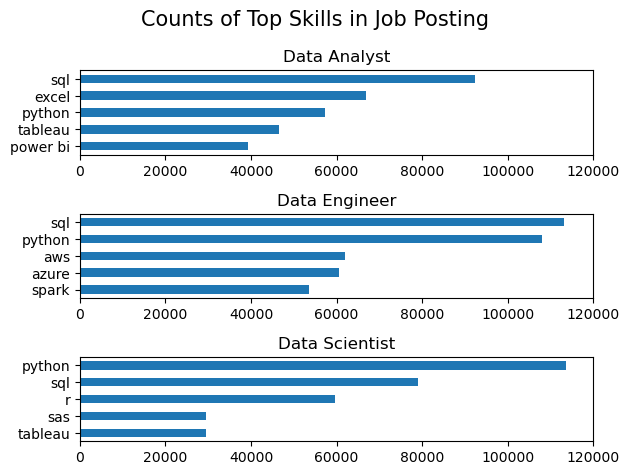

In [20]:
df_exploded=df.explode("job_skills")
skills_count = df_exploded.groupby(["job_title_short","job_skills"]).size()
df_skills_count = skills_count.reset_index(name="skill_count").sort_values(by="skill_count",ascending=False)
job_titles= ["Data Analyst","Data Engineer","Data Scientist"]
top_skills = 5
fig, ax = plt.subplots(3,1)
for i,job_title in enumerate(job_titles):
    df_skills_final = df_skills_count[df_skills_count["job_title_short"]==job_title].head(top_skills)
    df_skills_final.plot(kind="barh",x="job_skills",y="skill_count",ax=ax[i],title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].set_xlim(0,120000)
    ax[i].legend().set_visible(False)
fig.suptitle("Counts of Top Skills in Job Posting",fontsize=15)
fig.tight_layout()

    